# Movie Studio Analysis

## Overview

The purpose of this project is to analyze how films performed at the box office, and use data to find which are the most successful and why. This project focuses on "Return on Investment" (ROI) as a measure of a film's success across data types including; the month a film was released, length of film, and film genre.

## Business Problem

Microsoft has decided to venture into the film industry, but they need some insight on how to create profitable projects. Through research, we can analyze successful films in the past to deteremine what would help Microsoft excel above their competitors. By collecting data from a wide variety of films, we can provide Microsoft recommendations on how they can produce the most successful films. 

# Data Understanding

## Importing

In [123]:
import pandas as pd #import pandas under alias of pd
import numpy as np #import numpy under alias of np
import sqlite3 #import sqlite3
import seaborn as sns #import seaborn under alias of sns
import matplotlib.pyplot as plt #import matplotlib.pyplot under alias of plt
%matplotlib inline

## Data Preparation

In [124]:
#Get initial budget dataframe
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [125]:
#Rename column titled "movie" to "title" to join with other dataframe
budget_df.rename(columns = {"movie":"title"}, inplace=True)
budget_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [126]:
#Lets see how many entries are in the budget dataframe
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   title              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [127]:
#Check for duplicated data
print(budget_df.duplicated().any())

False


In [128]:
#Check for placeholder values
budget_df.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

id                   0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [129]:
#Create a connection
connection = sqlite3.connect("zippedData/im.db")

In [130]:
#Create a cursor
cursor = connection.cursor()

In [131]:
#SQL query to obtain list of tables
df = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", connection)
df

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [132]:
#Get movie basics dataframe
movie_basics_df = pd.read_sql("""SELECT * FROM movie_basics;""", connection)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [133]:
#Rename column of "primary_title" to "title" to correspond with budget dataframe
movie_basics_df.rename(columns = {"primary_title":"title"}, inplace=True)
movie_basics_df.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [134]:
#Lets see how many entries are in the budget dataframe
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   title            146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [135]:
movie_basics_df.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


The chart above provides statistical analysis on the numerical columns of the movie_basics dataframe. Of the 114,405 entries, the average film length is 86 minutes. Runtime minutes will be explored in the Analysis section.

In [136]:
#Check for duplicated data
print(movie_basics_df.duplicated().any())

False


In [137]:
#Check for placeholder values
movie_basics_df.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id           0
title              0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [138]:
#Merge budget and movie_basics dataframes through the shared column of "title"
merged_df = pd.merge(left=budget_df, right=movie_basics_df, on="title")
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3815 entries, 0 to 3814
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3815 non-null   int64  
 1   release_date       3815 non-null   object 
 2   title              3815 non-null   object 
 3   production_budget  3815 non-null   object 
 4   domestic_gross     3815 non-null   object 
 5   worldwide_gross    3815 non-null   object 
 6   movie_id           3815 non-null   object 
 7   original_title     3814 non-null   object 
 8   start_year         3815 non-null   int64  
 9   runtime_minutes    3328 non-null   float64
 10  genres             3743 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 357.7+ KB


In [139]:
merged_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


Some data did not merge properly. As seen above, the release date and title for "Avatar" do not match the original title or start year columns. We must find how many other values do not match with the merged data and decide to either drop this data or manually change the values.

In [140]:
#Create new column "release_date_year" to compare the years listed from both dataframes
merged_df["release_date_year"] = merged_df["release_date"].map(lambda x: int(x[-4:]))
merged_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,start_year,runtime_minutes,genres,release_date_year
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Abatâ,2011,93.0,Horror,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018


In [141]:
#Input placeholder value of "NaN" for rows where release date year and start year do not match
merged_df["movies"] = merged_df.apply(lambda x: np.nan if x["release_date_year"] != x["start_year"] 
                                                       else x["title"], axis=1)
merged_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,start_year,runtime_minutes,genres,release_date_year,movies
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Abatâ,2011,93.0,Horror,2009,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War


In [142]:
#Find number of values where release date and start year do not match
merged_df["movies"].isna().sum()

2268

In [143]:
#Input placeholder value of "NaN" for rows where title and original title do not match
merged_df["to_drop"] = merged_df.apply(lambda x: np.nan if x["release_date_year"] != x["start_year"] 
                                                               and x["title"] != x["original_title"] 
                                                        else x["title"], axis=1)
merged_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,movie_id,original_title,start_year,runtime_minutes,genres,release_date_year,movies,to_drop
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",tt1775309,Abatâ,2011,93.0,Horror,2009,NaN,NaN
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",tt6565702,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019,Dark Phoenix,Dark Phoenix
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,Avengers: Age of Ultron
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",tt4154756,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Avengers: Infinity War


In [144]:
#Find number of values where both year and title do not match
merged_df["to_drop"].isna().sum()

326

In [145]:
#Drop columns of "id" and "movie_id" as these do not contain pertinent data
merged_df.drop(["id", "movie_id"], axis=1, inplace=True)
merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres,release_date_year,movies,to_drop
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279",Abatâ,2011,93.0,Horror,2009,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019,Dark Phoenix,Dark Phoenix
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,Avengers: Age of Ultron
4,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Avengers: Infinity War


In [146]:
#Find number of values of placeholder values for each column
merged_df.isnull().sum()

release_date            0
title                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
original_title          1
start_year              0
runtime_minutes       487
genres                 72
release_date_year       0
movies               2268
to_drop               326
dtype: int64

In [147]:
#Drop placeholder values for "genres" and "runtime_minutes" columns
merged_df = merged_df.dropna(subset=["genres"])
merged_df = merged_df.dropna(subset=["runtime_minutes"])
merged_df.isnull().sum()

release_date            0
title                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
original_title          0
start_year              0
runtime_minutes         0
genres                  0
release_date_year       0
movies               1790
to_drop               298
dtype: int64

In [148]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3309 entries, 0 to 3814
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3309 non-null   object 
 1   title              3309 non-null   object 
 2   production_budget  3309 non-null   object 
 3   domestic_gross     3309 non-null   object 
 4   worldwide_gross    3309 non-null   object 
 5   original_title     3309 non-null   object 
 6   start_year         3309 non-null   int64  
 7   runtime_minutes    3309 non-null   float64
 8   genres             3309 non-null   object 
 9   release_date_year  3309 non-null   int64  
 10  movies             1519 non-null   object 
 11  to_drop            3011 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 336.1+ KB


In [149]:
#Convert values of "production_budget", "domestic_gross", and "worldwide_gross" into integers
merged_df["production_budget"] = merged_df["production_budget"].apply(lambda x: int(x.replace("$","").replace(",","")))

merged_df["domestic_gross"] = merged_df["domestic_gross"].apply(lambda x: int(x.replace("$","").replace(",","")))

merged_df["worldwide_gross"] = merged_df["worldwide_gross"].apply(lambda x: int(x.replace("$","").replace(",","")))

merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres,release_date_year,movies,to_drop
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Abatâ,2011,93.0,Horror,2009,NaN,NaN
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019,Dark Phoenix,Dark Phoenix
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,Avengers: Age of Ultron
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Avengers: Infinity War


In [153]:
#Use data from "worldwide_gross" and "production_budget" to create a new column and calculate ROI for each film
merged_df["ROI"] = (merged_df["worldwide_gross"]/merged_df["production_budget"])*100
merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres,release_date_year,movies,to_drop,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,Abatâ,2011,93.0,Horror,2009,NaN,NaN,653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",2011,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",2019,Dark Phoenix,Dark Phoenix,42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,Avengers: Age of Ultron,424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2048134200,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Avengers: Infinity War,682.711400


In [154]:
#Check for placeholder values
merged_df.isin(['?', '#', 'NaN','null', 'N/A', '-', 0]).sum()

release_date           0
title                  0
production_budget      0
domestic_gross       456
worldwide_gross      317
original_title         0
start_year             0
runtime_minutes        0
genres                 0
release_date_year      0
movies                 0
to_drop                0
ROI                  317
dtype: int64

The code above tells us that there are 456 placeholder values in the "domestic_gross" column, and 317 placeholder values in both the "worldwide_gross" and "ROI" columns. The code below checks for the percentage of a specific value that is present within each column. This checks which type of placeholder value is used for the three columns of interest. The placeholder value is the value of "0" for all three columns.

In [155]:
for col in merged_df.columns:
    print(col, '\n', merged_df[col].value_counts(normalize=True).head(), '\n\n')

release_date 
 Mar 27, 2015    0.007555
Apr 23, 2009    0.006649
Jun 5, 2009     0.006649
Feb 6, 2004     0.005742
Dec 31, 2012    0.005440
Name: release_date, dtype: float64 


title 
 Home          0.019946
Brothers      0.005440
The Gift      0.005440
The Return    0.004533
The Island    0.004231
Name: title, dtype: float64 


production_budget 
 10000000    0.036869
20000000    0.036567
5000000     0.032336
25000000    0.032034
15000000    0.031732
Name: production_budget, dtype: float64 


domestic_gross 
 0            0.137806
15433        0.006649
177397510    0.006649
501752       0.004533
28544157     0.002720
Name: domestic_gross, dtype: float64 


worldwide_gross 
 0            0.095799
44793168     0.006649
385997896    0.006649
5953886      0.004533
58978477     0.002720
Name: worldwide_gross, dtype: float64 


original_title 
 Home          0.013599
The Gift      0.004835
The Return    0.003929
Hamlet        0.003626
Cinderella    0.003022
Name: original_title, dtype: flo

In [156]:
#Replace values of "0" with placeholder value of "NaN" to drop this data
merged_df = merged_df.replace(0, np.nan)
merged_df.isna().sum()

release_date            0
title                   0
production_budget       0
domestic_gross        456
worldwide_gross       317
original_title          0
start_year              0
runtime_minutes         0
genres                  0
release_date_year       0
movies               1790
to_drop               298
ROI                   317
dtype: int64

In [157]:
#Drop placeholder data
merged_df = merged_df.dropna(subset=["domestic_gross"])
merged_df = merged_df.dropna(subset=["worldwide_gross"])
merged_df = merged_df.dropna(subset=["ROI"])
merged_df.isna().sum()

release_date            0
title                   0
production_budget       0
domestic_gross          0
worldwide_gross         0
original_title          0
start_year              0
runtime_minutes         0
genres                  0
release_date_year       0
movies               1496
to_drop               255
ROI                     0
dtype: int64

In [158]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 0 to 3812
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2853 non-null   object 
 1   title              2853 non-null   object 
 2   production_budget  2853 non-null   int64  
 3   domestic_gross     2853 non-null   float64
 4   worldwide_gross    2853 non-null   float64
 5   original_title     2853 non-null   object 
 6   start_year         2853 non-null   int64  
 7   runtime_minutes    2853 non-null   float64
 8   genres             2853 non-null   object 
 9   release_date_year  2853 non-null   int64  
 10  movies             1357 non-null   object 
 11  to_drop            2598 non-null   object 
 12  ROI                2853 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 312.0+ KB


In [159]:
#Sort merged dataframe by worldwide gross values
top_gross = merged_df.sort_values(by="worldwide_gross", ascending=False)
top_gross.head(10)

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres,release_date_year,movies,to_drop,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09,Abatâ,2011,93.0,Horror,2009,NaN,NaN,653.257713
43,"Dec 19, 1997",Titanic,200000000,659363944.0,2.208208e+09,Titanic,2018,115.0,Family,1997,NaN,Titanic,1104.104198
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482.0,2.048134e+09,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",2018,Avengers: Infinity War,Avengers: Infinity War,682.711400
25,"Jun 12, 2015",Jurassic World,215000000,652270625.0,1.648855e+09,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",2015,Jurassic World,Jurassic World,766.909239
67,"Apr 3, 2015",Furious 7,190000000,353007020.0,1.518723e+09,Furious Seven,2015,137.0,"Action,Crime,Thriller",2015,Furious 7,Furious 7,799.327786
19,"May 4, 2012",The Avengers,225000000,623279547.0,1.517936e+09,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi",2012,The Avengers,The Avengers,674.638176
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",2015,Avengers: Age of Ultron,Avengers: Age of Ultron,424.384139
41,"Feb 16, 2018",Black Panther,200000000,700059566.0,1.348258e+09,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",2018,Black Panther,Black Panther,674.129112
116,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,417719760.0,1.305773e+09,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",2018,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,768.101646
158,"Nov 22, 2013",Frozen,150000000,400738009.0,1.272470e+09,Frozen,2013,102.0,"Adventure,Animation,Comedy",2013,Frozen,Frozen,848.313273


In [160]:
#Sort merged dataframe by ROI values
top_ROI = merged_df.sort_values(by="ROI", ascending=False)
top_ROI.head(10)

,release_date,title,production_budget,domestic_gross,worldwide_gross,original_title,start_year,runtime_minutes,genres,release_date_year,movies,to_drop,ROI
3751,"Jul 10, 2015",The Gallows,100000,22764410.0,41656474.0,The Gallows,2015,81.0,"Horror,Mystery,Thriller",2015,The Gallows,The Gallows,41656.474000
3535,"Aug 13, 1942",Bambi,858000,102797000.0,268000000.0,Bambi,2013,58.0,"Biography,Documentary",1942,NaN,Bambi,31235.431235
2965,"Oct 1, 1968",Night of the Living Dead,114000,12087064.0,30087064.0,Night of the Living Dead,2014,79.0,Horror,1968,NaN,Night of the Living Dead,26392.161404
3452,"Nov 21, 1976",Rocky,1000000,117235147.0,225000000.0,Rocky,2013,136.0,"Action,Comedy,Drama",1976,NaN,Rocky,22500.000000
2047,"Oct 17, 1978",Halloween,325000,47000000.0,70000000.0,Halloween,2018,106.0,"Horror,Thriller",1978,NaN,Halloween,21538.461538
3400,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000,184925486.0,184925486.0,Snow White and the Seven Dwarfs,2017,49.0,"Animation,Family",1937,NaN,Snow White and the Seven Dwarfs,12427.788038
3454,"Jan 6, 2012",The Devil Inside,1000000,53262945.0,101759490.0,The Devil Inside,2012,83.0,Horror,2012,The Devil Inside,The Devil Inside,10175.949000
2417,"Feb 8, 1915",The Birth of a Nation,110000,10000000.0,11000000.0,The Birth of a Nation,2016,120.0,"Biography,Drama,History",1915,NaN,The Birth of a Nation,10000.000000
3683,"May 1, 1981",Graduation Day,250000,23894000.0,23894000.0,Graduation Day,2015,75.0,Thriller,1981,NaN,Graduation Day,9557.600000
407,"Feb 15, 1950",Cinderella,2900000,85000000.0,263591415.0,Cinderella,2018,150.0,Musical,1950,NaN,Cinderella,9089.359138


At this point, there are still 1,496 entries where the merged data does not match. This number is too high to manually change the data for all entries. Instead, I will manually change the values of entries that fall within the top 50 and bottom 50 values of the sorted top_gross dataframe and sorted top_ROI dataframe.

In [161]:
#Manually change the values of the top 50 and bottom 50 Top_Gross and Top_ROI lists
merged_df.loc[merged_df["title"] == "Avatar", "original_title"] = "Avatar"
merged_df.loc[merged_df["title"] == "Avatar", "start_year"] = 2009
merged_df.loc[merged_df["title"] == "Avatar", "runtime_minutes"] = 162.0
merged_df.loc[merged_df["title"] == "Avatar", "genres"] = "Action,Adventure,Fantasy,Sci-Fi"
merged_df.loc[merged_df["title"] == "Titanic", "start_year"] = 1997
merged_df.loc[merged_df["title"] == "Titanic", "runtime_minutes"] = 194.0
merged_df.loc[merged_df["title"] == "Titanic", "genres"] = "Drama,Romance"
merged_df.loc[merged_df["title"] == "Frozen", "original_title"] = "Frozen"
merged_df.loc[merged_df["title"] == "Frozen", "start_year"] = 2013
merged_df.loc[merged_df["title"] == "Frozen", "runtime_minutes"] = 108.0
merged_df.loc[merged_df["title"] == "Frozen", "genres"] = "Adventure,Animation,Comedy,Music"
merged_df.loc[merged_df["title"] == "Beauty and the Beast", "original_title"] = "Beauty and the Beast"
merged_df.loc[merged_df["title"] == "Beauty and the Beast", "start_year"] = 2017
merged_df.loc[merged_df["title"] == "Beauty and the Beast", "runtime_minutes"] = 139.0
merged_df.loc[merged_df["title"] == "Beauty and the Beast", "genres"] = "Fantasy,Music,Romance"
merged_df.loc[merged_df["title"] == "The Jungle Book", "start_year"] = 2016
merged_df.loc[merged_df["title"] == "The Jungle Book", "runtime_minutes"] = 106.0
merged_df.loc[merged_df["title"] == "The Jungle Book", "genres"] = "Adventure,Fantasy"
merged_df.loc[merged_df["title"] == "Inside Out", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "Inside Out", "runtime_minutes"] = 95.0
merged_df.loc[merged_df["title"] == "Inside Out", "genres"] = "Adventure,Animation,Drama"
merged_df.loc[merged_df["title"] == "Eddie: The Sleepwalking Cannibal", "original_title"] = "Eddie: The Sleepwalking Cannibal"
merged_df.loc[merged_df["title"] == "Eddie: The Sleepwalking Cannibal", "start_year"] = 2013
merged_df.loc[merged_df["title"] == "Eddie: The Sleepwalking Cannibal", "runtime_minutes"] = 83.0
merged_df.loc[merged_df["title"] == "The Looking Glass", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "The Looking Glass", "runtime_minutes"] = 110.0
merged_df.loc[merged_df["title"] == "The Looking Glass", "genres"] = "Drama,Music"
merged_df.loc[merged_df["title"] == "Sparrows Dance", "start_year"] = 2013
merged_df.loc[merged_df["title"] == "Sparrows Dance", "runtime_minutes"] = 81.0
merged_df.loc[merged_df["title"] == "Inescapable", "start_year"] = 2013
merged_df.loc[merged_df["title"] == "Inescapable", "genres"] = "Drama,Romance,Thriller"
merged_df.loc[merged_df["title"] == "Newlyweds", "start_year"] = 2012
merged_df.loc[merged_df["title"] == "Top Spin", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "Grace", "start_year"] = 2009
merged_df.loc[merged_df["title"] == "Grace", "runtime_minutes"] = 85.0
merged_df.loc[merged_df["title"] == "Grace", "genres"] = "Drama,Horror"
merged_df.loc[merged_df["title"] == "Hits", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "Hits", "runtime_minutes"] = 100.0
merged_df.loc[merged_df["title"] == "Sonny", "original_title"] = "Sonny"
merged_df.loc[merged_df["title"] == "Sonny", "start_year"] = 2002
merged_df.loc[merged_df["title"] == "Sonny", "runtime_minutes"] = 110.0
merged_df.loc[merged_df["title"] == "Test", "start_year"] = 2014
merged_df.loc[merged_df["title"] == "Test", "runtime_minutes"] = 90.0
merged_df.loc[merged_df["title"] == "R100", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "R100", "runtime_minutes"] = 100.0
merged_df.loc[merged_df["title"] == "Griff the Invisible", "start_year"] = 2011
merged_df.loc[merged_df["title"] == "Pink Ribbons, Inc.", "start_year"] = 2012
merged_df.loc[merged_df["title"] == "Bambi", "start_year"] = 1942
merged_df.loc[merged_df["title"] == "Bambi", "runtime_minutes"] = 70.0
merged_df.loc[merged_df["title"] == "Bambi", "genres"] = "Adventure,Animation,Drama"
merged_df.loc[merged_df["title"] == "Rocky", "start_year"] = 1976
merged_df.loc[merged_df["title"] == "Rocky", "runtime_minutes"] = 119.0
merged_df.loc[merged_df["title"] == "Rocky", "genres"] = "Action,Drama,Sport"
merged_df.loc[merged_df["title"] == "Snow White and the Seven Dwarfs", "start_year"] = 1937
merged_df.loc[merged_df["title"] == "Snow White and the Seven Dwarfs", "runtime_minutes"] = 83.0
merged_df.loc[merged_df["title"] == "Snow White and the Seven Dwarfs", "genres"] = "Animation,Music,Romance"
merged_df.loc[merged_df["title"] == "Graduation Day", "start_year"] = 1981
merged_df.loc[merged_df["title"] == "Graduation Day", "runtime_minutes"] = 96.0
merged_df.loc[merged_df["title"] == "Graduation Day", "genres"] = "Horror,Mystery"
merged_df.loc[merged_df["title"] == "Insidious", "start_year"] = 2011
merged_df.loc[merged_df["title"] == "Unfriended", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "Benji", "start_year"] = 1974
merged_df.loc[merged_df["title"] == "Benji", "runtime_minutes"] = 87.0
merged_df.loc[merged_df["title"] == "Benji", "genres"] = "Adventure,Family,Romance"
merged_df.loc[merged_df["title"] == "Split", "start_year"] = 2017
merged_df.loc[merged_df["title"] == "Split", "runtime_minutes"] = 117.0
merged_df.loc[merged_df["title"] == "Split", "genres"] = "Horror,Thriller"
merged_df.loc[merged_df["title"] == "Fantasia", "start_year"] = 1940
merged_df.loc[merged_df["title"] == "Fantasia", "runtime_minutes"] = 125.0
merged_df.loc[merged_df["title"] == "Fantasia", "genres"] = "Animation,Comedy,Music"
merged_df.loc[merged_df["title"] == "Swingers", "start_year"] = 1996
merged_df.loc[merged_df["title"] == "Swingers", "runtime_minutes"] = 96.0
merged_df.loc[merged_df["title"] == "Swingers", "genres"] = "Comedy,Romance"
merged_df.loc[merged_df["title"] == "Lights Out", "original_title"] = "Lights Out"
merged_df.loc[merged_df["title"] == "Lights Out", "start_year"] = 2016
merged_df.loc[merged_df["title"] == "Lights Out", "runtime_minutes"] = 81.0
merged_df.loc[merged_df["title"] == "Lights Out", "genres"] = "Horror,Thriller"
merged_df.loc[merged_df["title"] == "Truth or Dare", "start_year"] = 2018
merged_df.loc[merged_df["title"] == "Truth or Dare", "runtime_minutes"] = 100.0
merged_df.loc[merged_df["title"] == "Truth or Dare", "genres"] = "Horror,Thriller"
merged_df.loc[merged_df["title"] == "Your Sister's Sister", "start_year"] = 2012
merged_df.loc[merged_df["title"] == "Ghost", "original_title"] = "Ghost"
merged_df.loc[merged_df["title"] == "Ghost", "start_year"] = 1990
merged_df.loc[merged_df["title"] == "Ghost", "runtime_minutes"] = 128.0
merged_df.loc[merged_df["title"] == "Ghost", "genres"] = "Fantasy,Romance"
merged_df.loc[merged_df["title"] == "Live and Let Die", "start_year"] = 1973
merged_df.loc[merged_df["title"] == "Live and Let Die", "runtime_minutes"] = 121.0
merged_df.loc[merged_df["title"] == "Live and Let Die", "genres"] = "Action,Crime"
merged_df.loc[merged_df["title"] == "Billy Elliot", "original_title"] = "Billy Elliot"
merged_df.loc[merged_df["title"] == "Billy Elliot", "start_year"] = 2000
merged_df.loc[merged_df["title"] == "Billy Elliot", "runtime_minutes"] = 110.0
merged_df.loc[merged_df["title"] == "Billy Elliot", "genres"] = "Comedy,Drama,Music"
merged_df.loc[merged_df["title"] == "Cabin Fever", "start_year"] = 2003
merged_df.loc[merged_df["title"] == "Cabin Fever", "runtime_minutes"] = 94.0
merged_df.loc[merged_df["title"] == "Cabin Fever", "genres"] = "Comedy,Horror"
merged_df.loc[merged_df["title"] == "The Visit", "start_year"] = 2015
merged_df.loc[merged_df["title"] == "The Visit", "runtime_minutes"] = 94.0
merged_df.loc[merged_df["title"] == "The Visit", "genres"] = "Horror,Thriller"
merged_df.loc[merged_df["title"] == "A Quiet Place", "start_year"] = 2018
merged_df.loc[merged_df["title"] == "A Quiet Place", "runtime_minutes"] = 90.0
merged_df.loc[merged_df["title"] == "A Quiet Place", "genres"] = "Horror,Sci-Fi,Thriller"
merged_df.loc[merged_df["title"] == "The Mask", "start_year"] = 1994
merged_df.loc[merged_df["title"] == "The Mask", "runtime_minutes"] = 101.0
merged_df.loc[merged_df["title"] == "The Mask", "genres"] = "Comedy,Crime,Fantasy"
merged_df.loc[merged_df["title"] == "Good", "start_year"] = 2008
merged_df.loc[merged_df["title"] == "Good", "runtime_minutes"] = 96.0
merged_df.loc[merged_df["title"] == "Good", "genres"] = "Drama,War"
merged_df.loc[merged_df["title"] == "United Passions", "start_year"] = 2015


In [162]:
#check for duplicated data
print(merged_df.duplicated().any())

True


In [163]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 0 to 3812
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2853 non-null   object 
 1   title              2853 non-null   object 
 2   production_budget  2853 non-null   int64  
 3   domestic_gross     2853 non-null   float64
 4   worldwide_gross    2853 non-null   float64
 5   original_title     2853 non-null   object 
 6   start_year         2853 non-null   int64  
 7   runtime_minutes    2853 non-null   float64
 8   genres             2853 non-null   object 
 9   release_date_year  2853 non-null   int64  
 10  movies             1357 non-null   object 
 11  to_drop            2598 non-null   object 
 12  ROI                2853 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 312.0+ KB


In [164]:
#Drop duplicates
merged_df.drop_duplicates(subset="title", keep="first", inplace=True)
print(merged_df.duplicated().any())

False


In [165]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1910 entries, 0 to 3812
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1910 non-null   object 
 1   title              1910 non-null   object 
 2   production_budget  1910 non-null   int64  
 3   domestic_gross     1910 non-null   float64
 4   worldwide_gross    1910 non-null   float64
 5   original_title     1910 non-null   object 
 6   start_year         1910 non-null   int64  
 7   runtime_minutes    1910 non-null   float64
 8   genres             1910 non-null   object 
 9   release_date_year  1910 non-null   int64  
 10  movies             1221 non-null   object 
 11  to_drop            1794 non-null   object 
 12  ROI                1910 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 208.9+ KB


In [166]:
#Re-enter code for checking what entries still do not match from the merged dataframe
merged_df["movies"] = merged_df.apply(lambda x: np.nan if x["release_date_year"] != x["start_year"] 
                                                       else x["title"], axis=1)

In [167]:
merged_df["to_drop"] = merged_df.apply(lambda x: np.nan if x["release_date_year"] != x["start_year"] 
                                                               and x["title"] != x["original_title"] 
                                                        else x["title"], axis=1)

In [168]:
merged_df.isna().sum()

release_date           0
title                  0
production_budget      0
domestic_gross         0
worldwide_gross        0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
release_date_year      0
movies               648
to_drop              109
ROI                    0
dtype: int64

There are now 648 entries remaining where the merged data between budget_df and movie_basics_df do not match. These entries will now be dropped and we will have our final merged dataframe.

In [169]:
#Drop placeholder values
merged_df = merged_df.dropna(subset=["movies"])
merged_df.isnull().sum()

release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
original_title       0
start_year           0
runtime_minutes      0
genres               0
release_date_year    0
movies               0
to_drop              0
ROI                  0
dtype: int64

In [170]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1262 entries, 0 to 3812
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1262 non-null   object 
 1   title              1262 non-null   object 
 2   production_budget  1262 non-null   int64  
 3   domestic_gross     1262 non-null   float64
 4   worldwide_gross    1262 non-null   float64
 5   original_title     1262 non-null   object 
 6   start_year         1262 non-null   int64  
 7   runtime_minutes    1262 non-null   float64
 8   genres             1262 non-null   object 
 9   release_date_year  1262 non-null   int64  
 10  movies             1262 non-null   object 
 11  to_drop            1262 non-null   object 
 12  ROI                1262 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 138.0+ KB


The final merged dataframe contains 1,262 entries.

In [171]:
#Drop columns that do not contain pertinent information for analysis
merged_df.drop(["original_title", "start_year", "release_date_year", "movies", "to_drop"], axis=1, inplace=True)
merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09,162.0,"Action,Adventure,Fantasy,Sci-Fi",653.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,136.0,"Action,Adventure,Fantasy",254.667286
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,1.497624e+08,113.0,"Action,Adventure,Sci-Fi",42.789243
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,141.0,"Action,Adventure,Sci-Fi",424.384139
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",682.711400


In [174]:
merged_df["ROI"] = ((merged_df["worldwide_gross"] - merged_df["production_budget"])/merged_df["production_budget"])
merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI
0,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09,162.0,"Action,Adventure,Fantasy,Sci-Fi",5.532577
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,136.0,"Action,Adventure,Fantasy",1.546673
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,1.497624e+08,113.0,"Action,Adventure,Sci-Fi",-0.572108
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,141.0,"Action,Adventure,Sci-Fi",3.243841
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",5.827114


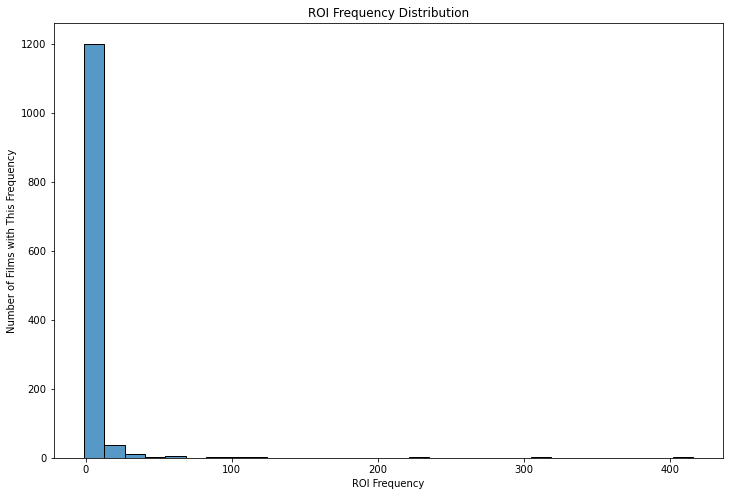

In [175]:
#Create histogram demonstarting the frequency of each ROI value within the dataframe
fig, ax = plt.subplots(figsize=(12,8))
sns.histplot(
    merged_df["ROI"],
    bins=30,
    ax=ax,   
    legend=False 
).set(
    xlabel="ROI Frequency", 
    ylabel="Number of Films with This Frequency", 
    title="ROI Frequency Distribution"
);

# Analysis

## Month

In [176]:
#Creat column of "month" for what month of the year each film was released in
merged_df["month"] = merged_df["release_date"].map(lambda x: (x[0:3]))
merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,month
0,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09,162.0,"Action,Adventure,Fantasy,Sci-Fi",5.532577,Dec
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,136.0,"Action,Adventure,Fantasy",1.546673,May
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,1.497624e+08,113.0,"Action,Adventure,Sci-Fi",-0.572108,Jun
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,141.0,"Action,Adventure,Sci-Fi",3.243841,May
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",5.827114,Apr


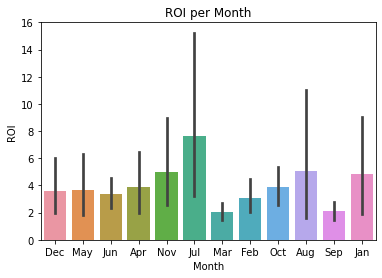

In [177]:
#Create a bar plot demonstrating all 12 months of the year and their associated ROI values
month_barplot = sns.barplot(x = merged_df["month"],
            y = merged_df["ROI"])
month_barplot.set(xlabel="Month", ylabel="ROI", title="ROI per Month");

## Runtime Minutes

In [178]:
#Create "movie_length" column that divides films into three categories based on runtime minutes
merged_df["movie_length"] = merged_df["runtime_minutes"].map(lambda x: "<= 90" if x<=90.0 else ">=150" if x>=150.0 else "90-150")
merged_df.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,month,movie_length
0,"Dec 18, 2009",Avatar,425000000,760507625.0,2.776345e+09,162.0,"Action,Adventure,Fantasy,Sci-Fi",5.532577,Dec,>=150
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,136.0,"Action,Adventure,Fantasy",1.546673,May,90-150
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350.0,1.497624e+08,113.0,"Action,Adventure,Sci-Fi",-0.572108,Jun,90-150
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,141.0,"Action,Adventure,Sci-Fi",3.243841,May,90-150
4,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",5.827114,Apr,90-150


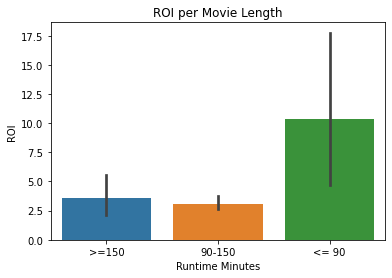

In [179]:
#Create bar plot demonstrating ROI based on category of runtime minutes
runtime_barplot = sns.barplot(x = merged_df["movie_length"],
            y = merged_df["ROI"])
runtime_barplot.set(xlabel="Runtime Minutes", ylabel="ROI", title="ROI per Movie Length");

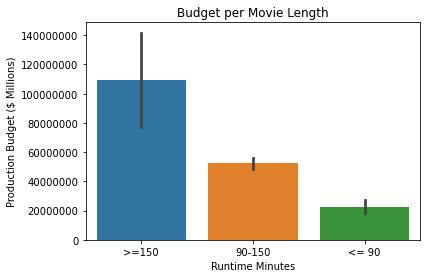

In [195]:
#Create bar plot demontrating the budget of films based on category of runtime minutes
budget_barplot = sns.barplot(x = merged_df["movie_length"],
            y = merged_df["production_budget"])
budget_barplot.set(xlabel="Runtime Minutes", ylabel="Production Budget ($ Millions)", title="Budget per Movie Length")

plt.ticklabel_format(style='plain', axis='y')

plt.show();

## Genres

In [196]:
#Get dataframe of top 100 films based on ROI
top_ROI = merged_df.sort_values(by="ROI", ascending=False)
top_100_ROI = top_ROI[0:100]

In [197]:
top_100_ROI["genres"] = top_100_ROI["genres"].apply(lambda x: x.split(",") if x else x)
top_100_ROI.head()

<ipython-input-197-133826888ea5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100_ROI["genres"] = top_100_ROI["genres"].apply(lambda x: x.split(",") if x else x)


,release_date,title,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,month,movie_length
3751,"Jul 10, 2015",The Gallows,100000,22764410.0,41656474.0,81.0,"[Horror, Mystery, Thriller]",415.564740,Jul,<= 90
3535,"Aug 13, 1942",Bambi,858000,102797000.0,268000000.0,70.0,"[Adventure, Animation, Drama]",311.354312,Aug,<= 90
3452,"Nov 21, 1976",Rocky,1000000,117235147.0,225000000.0,119.0,"[Action, Drama, Sport]",224.000000,Nov,90-150
3400,"Dec 21, 1937",Snow White and the Seven Dwarfs,1488000,184925486.0,184925486.0,83.0,"[Animation, Music, Romance]",123.277880,Dec,<= 90
3454,"Jan 6, 2012",The Devil Inside,1000000,53262945.0,101759490.0,83.0,[Horror],100.759490,Jan,<= 90


In [198]:
#Get all unique genres
genres = set()

for genre in top_100_ROI["genres"]:
    if genre:
        genres.update(genre)

genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller'}

In [199]:
#Get count of how often a genre appears in the top 100 ROI dataframe
genres_count = {}

for genres in top_100_ROI["genres"]:
    for genre in genres:
        if genre not in genres_count:
            genres_count[genre] = 1
        else:
            genres_count[genre] += 1
        
genres_count

{'Horror': 35,
 'Mystery': 21,
 'Thriller': 31,
 'Adventure': 12,
 'Animation': 7,
 'Drama': 45,
 'Action': 10,
 'Sport': 2,
 'Music': 7,
 'Romance': 18,
 'Family': 3,
 'Comedy': 28,
 'Biography': 10,
 'Fantasy': 9,
 'Crime': 5,
 'Sci-Fi': 9,
 'Documentary': 2}

In [200]:
#Sort data in numerical order based on value
sorted_genres_count = dict(sorted(genres_count.items(), key=lambda x:x[1], reverse=True))
sorted_genres_count

{'Drama': 45,
 'Horror': 35,
 'Thriller': 31,
 'Comedy': 28,
 'Mystery': 21,
 'Romance': 18,
 'Adventure': 12,
 'Action': 10,
 'Biography': 10,
 'Fantasy': 9,
 'Sci-Fi': 9,
 'Animation': 7,
 'Music': 7,
 'Crime': 5,
 'Family': 3,
 'Sport': 2,
 'Documentary': 2}

In [201]:
#Get labels and values ready to graph
counts_list = list(sorted_genres_count.items())

ticks = np.arange(17)

labels = labels = []
frequencies = []
for genre, frequency in counts_list:
    labels.append(genre)
    frequencies.append(frequency)

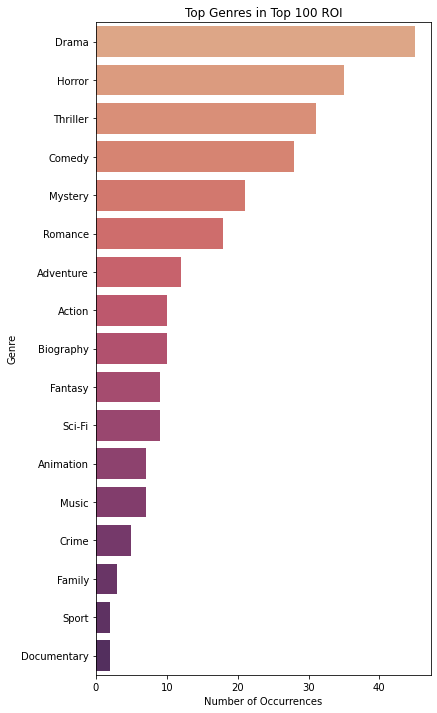

In [202]:
#Create bar plot demonstrating number of occurrences of each genre within top 100 ROI dataframe
fig, ax = plt.subplots(figsize=(6, 12))

sns.barplot(
    x = frequencies, 
    y = ticks, 
    orient = "h",
    ax = ax,  
    palette = "flare" 
).set(
    yticklabels = labels,
    ylabel = "Genre",
    xlabel = "Number of Occurrences", 
    title = "Top Genres in Top 100 ROI"
);

# Recommendations

The analaysis of films above provides three recommendations for Microsoft:

-Films should be released in the months of July and August. These months have the greatest ROI compared to the other months of the year.

-Films should be made with runtimes of 90 minutes or shorter. There is a correlation between production budget and movie length; the shorter a film is, the lower the budget. By making a film under 90 minutes, not only is less money required to make the film, data suggests that there will be a greater return on investment.

-Films made by Microsoft should either be dramas, horrors, or thrillers. These three genres are the most profitable genres found in the dataframe of top 100 films categorized by ROI.

# Next Steps

Source actors/actresses that have been successful in past films. We can research some of the best in the industry to produce a top grossing film.


Explore soundtracks that have increased popularity in a film. A films popularity can greatly increase by the traction the soundtrack gets. Doing research on past soundtrack artists and producers can help a film shine.


Find directors associated with successful films. Directors can make or break a films success. By exploring top grossing directors, Microsoft can recruit the best to produce their films. 
